# Question - 1 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

## (a) Sample X-Y

In [81]:
#creating random dataset

#set the random seed to ensure reproducibility
random.seed(123)

#define the number of samples to generate
n_samples = 50

#generate random values for X and calculate Y based on a linear equation with some random noise added
X = np.random.uniform(0, 1, n_samples)
Y = 2 + 3*X + np.random.normal(0, 0.1, n_samples)

#create a dictionary of X and Y values and convert it to a pandas dataframe
data = {'X': X, 'Y': Y}
df = pd.DataFrame(data)

#convert X and Y to 2D arrays
X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)

#split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, random_state=0)

df.head()

,X,Y
0,0.623953,3.997383
1,0.115618,2.277968
2,0.317285,3.117952
3,0.414826,3.325209
4,0.866309,4.567452


In [82]:
#create a LinearRegression object
regressor = LinearRegression()

#fit the training data to the model
regressor.fit(X_train, Y_train)

LinearRegression()

### SLR COEFFICIENTS

In [83]:
#get the slope and intercept of the fitted line
slope = regressor.coef_
intercept = regressor.intercept_

#print SLR coefficient and intercept
print("slope =", slope, "and Intercept=", intercept)

slope = [[2.9854074]] and Intercept= [2.00478306]


### REGRESSION GRAPH

In [10]:
#generate predictions for the training data
Y_pred_train = regressor.predict(X_train)
Y_pred_train.flatten()

array([3.5313551 , 3.51225346, 4.49573468, 4.23791775, 4.77292412,
       4.29051925, 4.47871315, 3.44796511, 4.15113389, 4.46715321,
       3.74706487, 2.95382892, 4.0813703 , 2.26623106, 3.55326059,
       4.84266742, 4.14775144, 2.32641043, 4.62422944, 2.99153391,
       2.28832108, 3.16239491, 4.16266597, 2.98271257, 4.22135611,
       2.47918839, 2.27687036, 3.54566468, 2.62270788, 2.45005297,
       3.85171385, 4.87802886, 4.00710924, 2.71299613, 2.36806881,
       4.7523546 , 4.62856647])

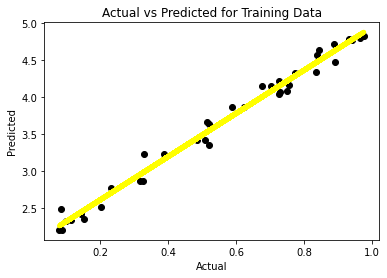

In [11]:
#visualize the predictions for the training data
plt.scatter(X_train, Y_train, color='black')
plt.plot(X_train, Y_pred_train, color='yellow', linewidth=5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Training Data')
plt.show()

In [13]:
#calculate the R-squared value for the training data
r2_train=r2_score(Y_train, Y_pred_train)
r2_train

0.9847293305842313

In [15]:
#predict the values for the testing set and flatten to a 1D array
Y_pred_test = regressor.predict(X_test).flatten()
Y_pred_test.flatten()

array([3.90348259, 3.23120715, 2.85807352, 4.10738483, 2.30694965,
       4.23896013, 4.76214395, 4.55670154, 2.86452659, 3.80044241,
       4.86914636, 4.51059892, 2.72333543])

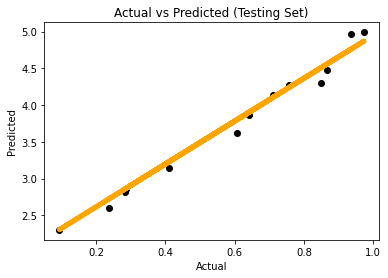

In [22]:
#plot the actual vs predicted values for the testing set
plt.scatter(X_test, Y_test, color='black')
plt.plot(X_test, Y_pred_test, color='orange', linewidth=5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Testing Set)')
plt.show()

In [23]:
#calculate the R-squared value for the testing set
r_squared_test = r2_score(Y_test, Y_pred_test)
r_squared_test

0.9828471752636287

### PREDICT THE OUTPUT FOR A NEW DATAPOINT

In [30]:
#predict the output for a new datapoint
new_data = [[0.49494]]
new_prediction = regressor.predict(new_data)
new_prediction

array([[3.47545864]])

In [32]:
#flatten the arrays
Y_test_flat = Y_test.flatten()
Y_pred_test_flat = Y_pred_test.flatten()
diff_flat = (Y_test - Y_pred_test).flatten()

In [91]:
#create a dataframe to compare actual and predicted values
pred_df = pd.DataFrame({
    'Actual Value': Y_test_flat,
    'Predicted Value': Y_pred_test_flat,
    'Difference': (Y_test.flatten() - Y_pred_test.flatten()).ravel()
})
pred_df.head(3)

,Actual Value,Predicted Value,Difference
0,3.865134,3.903483,-1.278199
1,3.146832,3.231207,1.121080
2,2.823581,2.858074,-0.381167


### SLR ERRORS

In [50]:
#calculate Mean Absolute Error using inbuilt function
mae_inbuilt = mean_absolute_error(Y_test, Y_pred_test)
mae_inbuilt

0.08799104994195407

In [51]:
#calculate Mean Squared Error using inbuilt function
mse_inbuilt = mean_squared_error(Y_test, Y_pred_test)
mse_inbuilt

0.012851962203605856

In [52]:
#calculate Sum of Squared Residuals
ssr = ((Y_pred_test - Y_test)**2).sum()
ssr

242.25109922702487

In [53]:
#calculate Mean Absolute Error manually
mae_manual = np.mean(np.abs(Y_test - Y_pred_test))
mae_manual

0.970814985737058

In [54]:
#calculate Mean Squared Error manually
mse_manual = np.mean((Y_test - Y_pred_test)**2)
mse_manual

1.4334384569646441

In [55]:
#print the calculated errors
print("Mean Absolute Error (inbuilt):", mae_inbuilt)
print("Mean Absolute Error (manual):", mae_manual)
print("Mean Squared Error (inbuilt):", mse_inbuilt)
print("Mean Squared Error (manual):", mse_manual)
print("Sum of Squared Residuals:", ssr)

Mean Absolute Error (inbuilt): 0.08799104994195407
Mean Absolute Error (manual): 0.970814985737058
Mean Squared Error (inbuilt): 0.012851962203605856
Mean Squared Error (manual): 1.4334384569646441
Sum of Squared Residuals: 242.25109922702487


## (b) Student marks 

In [57]:
#set the random seed for reproducibility
np.random.seed(123)

#generate a random data set
n = 20
ML = np.random.uniform(0, 20, n)
DSA = 2 + 0.2*ML + np.random.uniform(0, 1, n)
DSA = DSA / np.max(DSA) * 10

#create a dictionary and convert it to a dataframe
sample = {'ML': ML,
          'DSA': DSA}
df = pd.DataFrame(sample)

df.head()

,ML,DSA
0,13.929384,8.624361
1,5.722787,6.354952
2,4.537029,5.778760
3,11.026295,7.663327
4,14.389379,8.910831


In [58]:
#convert ML and DSA to 2D arrays
ML = np.array(ML).reshape(-1,1)
DSA = np.array(DSA).reshape(-1,1)

#split the dataset into training and testing sets
ML_train, ML_test, DSA_train, DSA_test = train_test_split(ML, DSA, test_size=1/4, random_state=0)

In [62]:
#create a linear regression model
lr_model = LinearRegression()

#train the model using the training data
lr_model.fit(ML_train, DSA_train)

LinearRegression()

### SLR COEFFICIENTS

In [63]:
#get the coefficients of the linear regression model
m = lr_model.coef_
print("Coefficient (m):", m)

Coefficient (m): [[0.29803071]]


In [64]:
#get the intercept of the linear regression model
c = lr_model.intercept_
print("Intercept (c):", c)

Intercept (c): [4.19314361]


In [65]:
#predict DSA values using the training data
DSA_pred_train = lr_model.predict(ML_train).flatten()
DSA_pred_train

array([ 5.23894382, 10.03910055,  4.54886052,  8.48162052,  5.54531759,
        6.71511795,  6.56573182,  6.53040483,  8.27514943,  5.28090639,
        8.5387276 ,  7.47931821,  8.34452768,  8.59204945,  6.80730353])

### REGRESSION GRAPH

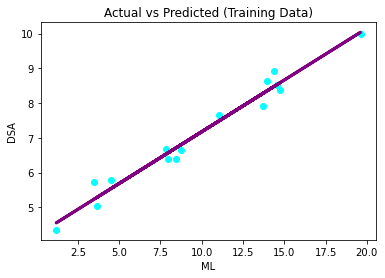

In [69]:
#plot actual vs predicted values for the training data
plt.scatter(ML_train, DSA_train, color='cyan')
plt.plot(ML_train, DSA_pred_train, color='purple', linewidth=3)
plt.xlabel('ML')
plt.ylabel('DSA')
plt.title('Actual vs Predicted (Training Data)')
plt.show()

In [70]:
#get the R-squared score for the training data
r2_train = r2_score(DSA_train, DSA_pred_train)
print("R-squared score (training data):", r2_train)

R-squared score (training data): 0.9702040391751029


In [71]:
#predict DSA values using the testing data
DSA_pred_test = lr_model.predict(ML_test).flatten()
DSA_pred_test

array([7.36151624, 5.89870977, 7.36316264, 7.0597931 , 6.23869534])

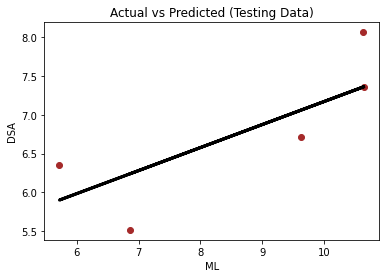

In [77]:
#plot actual vs predicted values for the testing data
plt.scatter(ML_test, DSA_test, color='brown')
plt.plot(ML_test, DSA_pred_test, color='black', linewidth=3)
plt.xlabel('ML')
plt.ylabel('DSA')
plt.title('Actual vs Predicted (Testing Data)')
plt.show()

In [78]:
#get the R-squared score for the testing data
r2_test = r2_score(DSA_test, DSA_pred_test)
print("R-squared score (testing data):", r2_test)

R-squared score (testing data): 0.6422952886357938


### PREDICT THE OUTPUT FOR A NEW DATAPOINT

In [86]:
new_data = [[10]]
lr_model.predict(new_data)

array([[7.17345067]])

In [80]:
#create a dataframe with actual and predicted DSA values and the difference between them
pred_df = pd.DataFrame({
    'Actual DSA Value': DSA_test.ravel(),
    'Predicted DSA Value': DSA_pred_test.ravel(),
    'Difference': (DSA_test.flatten() - DSA_pred_test.flatten()).ravel()
})
print(pred_df)

   Actual DSA Value  Predicted DSA Value  Difference
0          8.067606             7.361516    0.706089
1          6.354952             5.898710    0.456242
2          7.365570             7.363163    0.002408
3          6.710494             7.059793   -0.349299
4          5.512971             6.238695   -0.725724


### SLR ERRORS

In [87]:
#calculate Mean Absolute Error using inbuilt function
mae_inbuilt = mean_absolute_error(DSA_test, DSA_pred_test)
mae_inbuilt

0.4479526027417993

In [88]:
#calculate Mean Squared Error using inbuilt function
mse_inbuilt = mean_squared_error(DSA_test, DSA_pred_test)
mse_inbuilt

0.2710822230521982

In [89]:
#calculate Sum of Squared Residuals
ssr = ((DSA_pred_test - DSA_test)**2).sum()
ssr

28.084556177489972